In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from pathlib import Path
import math
import time
import random
import scipy.io as sio
import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import dill as pickle
# fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

from PIL import Image

In [5]:
# use the parent's path
import sys
sys.path.append("../")

In [6]:
from config import config_cls

In [7]:
config = config_cls[os.getenv('ENV', 'default')]

In [8]:
IS_IN_MASK_PIXEL_VALUE = (0, 0, 0, 255)

# Tile width / height in pixels
TILE_WIDTH_PX = 512
TILE_HEIGHT_PX = 512

In [9]:
tile_x, tile_y = 7680, 10240

In [10]:
datadir = config.DATA_ROOT /'raw'/ f'sentinel-2a-tile-{tile_x}x-{tile_y}y'

In [11]:
files = [file_name for file_name in (datadir / 'timeseries').glob(f'{tile_x}-{tile_y}-*.png')]
sensing_band_types = [file_name.name.split('-')[2] for file_name in files]
date_str = [
    file_name.name[len(f'{tile_x}-{tile_y}-{band}-'): -1 * len('.png')]
    for file_name, band in zip(files, sensing_band_types)]
meta = pd.DataFrame({'IMG_FILE': files, 'SENSING_BAND': sensing_band_types, 'DATE_DT': date_str}).sort_values(['SENSING_BAND', 'DATE_DT'])
# The assumption that is all sensing band image have save date range
assert meta.SENSING_BAND.value_counts().max() == meta.SENSING_BAND.value_counts().min()

In [53]:
eda_imags = meta.query('SENSING_BAND == "TCI"')

In [56]:
# _, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
means =[]
for row in eda_imags.itertuples():
    means.append(np.array(Image.open(row.IMG_FILE)).mean())

In [57]:
eda_imags = eda_imags.assign(
    MEAN=means,
    DATE_DT=pd.to_datetime(eda_imags.DATE_DT)
)

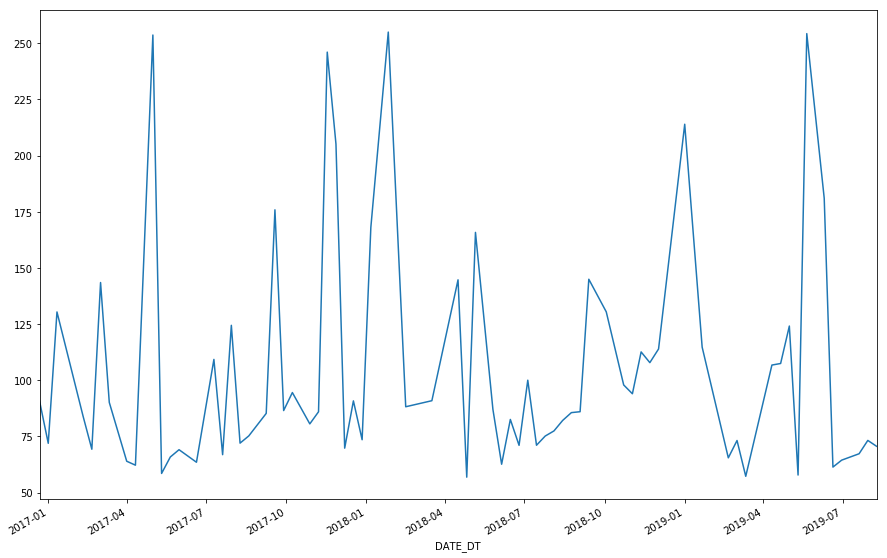

In [60]:
 _, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
eda_imags.set_index('DATE_DT')['MEAN'].plot()